In [11]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
#print('class label',np.unique(y))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)


Perceptron(eta0=0.1, random_state=1)

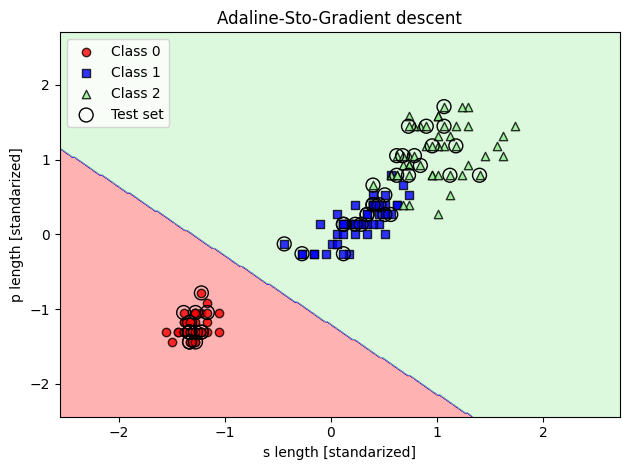

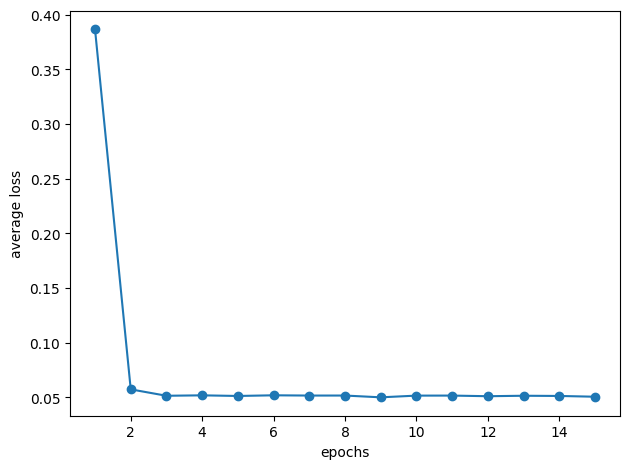

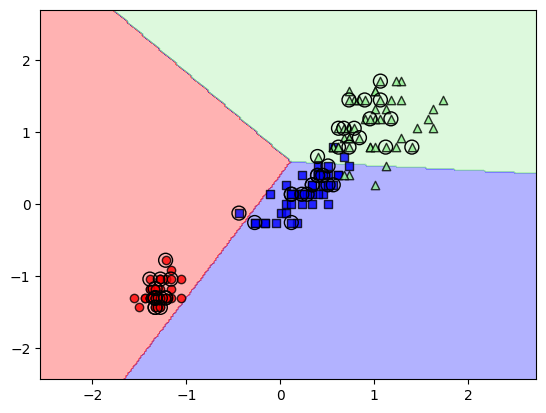

In [9]:
import matplotlib.pyplot as plt
class AdalineSGD:
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        self.w_initialized=False
        self.shuffle=shuffle
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.losses_=[]
        for i in range(self.n_iter):
            X,y=self._shuffle(X,y)
            losses=[]
            for xi,target in zip(X,y):
                losses.append(self._update_weights(xi,target))
            avg_loss=np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
    def _shuffle(self,X,y):
        r=self.rgen.permutation(len(y))
        return X[r],y[r]
    def _initialize_weights(self,m):
        self.rgen=np.random.RandomState(self.random_state)
        self.w_=self.rgen.normal(loc=0.0,scale=0.01,size=m)
        self.b_=np.float_(0.)
        self.w_initialized=True
    def _update_weights(self,xi,target):
        output=self.activation(self.net_input(xi))
        error=target-output
        self.w_+=self.eta*2*xi*error
        self.b_+=self.eta*2*error
        loss=error**2
        return loss
    def net_input(self,X):
        return np.dot(X,self.w_)+self.b_
    def activation(self,X):
        return X
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.5,1,0)
ada_sgd=AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada_sgd.fit(X_train_std,y_train)
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab=lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolor='black')
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='none',edgecolor='black',alpha=1.0,linewidths=1,marker='o',s=100,label='Test set')
plot_decision_regions(X_combined_std,y_combined,classifier=ada_sgd,test_idx=range(105,150))
plt.title('Adaline-Sto-Gradient descent')
plt.xlabel('s length [standarized]')
plt.ylabel('p length [standarized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada_sgd.losses_)+1),ada_sgd.losses_,marker='o')
plt.xlabel('epochs')
plt.ylabel('average loss')
plt.tight_layout()
plt.show()
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))
plt.figure
plot_decision_regions(X_combined_std,y_combined,classifier=ppn,test_idx=range(105,150))